In [30]:
import pandas as pd
data = pd.read_csv("data.csv")
data.head()


,url,html_content
0,https://www.cm-alliance.com/cybersecurity-blog,"<!doctype html><!--[if lt IE 7]> <html class=""..."
1,https://www.varonis.com/blog/cybersecurity-tips,"<!doctype html><html lang=""en""><head>\n <me..."
2,https://www.cisecurity.org/insights/blog/11-cy...,<!DOCTYPE html><html data-unhead-vue-server-re...
3,https://www.cisa.gov/topics/cybersecurity-best...,"\n\n<!DOCTYPE html>\n<html lang=""en"" dir=""ltr""..."
4,https://www.qnbtrust.bank/Resources/Learning-C...,NaN


In [31]:
from bs4 import BeautifulSoup

def extract_content(html):
    try:
        soup = BeautifulSoup(html, "html.parser")

        title = soup.title.string.strip() if soup.title and soup.title.string else ""

        for tag in soup(["script", "style", "noscript"]):
            tag.decompose()

        text = " ".join(soup.stripped_strings)
        return title, text
    except Exception:
        return "", ""

# Apply function
data[["title", "body_text"]] = data["html_content"].apply(lambda x: pd.Series(extract_content(str(x))))

# Word count
data["word_count"] = data["body_text"].apply(lambda x: len(str(x).split()))

# Save cleaned content
data[["url", "title", "body_text", "word_count"]].to_csv("extracted_content.csv", index=False)

print("✅ Extraction completed and saved as extracted_content.csv")
data.head()


✅ Extraction completed and saved as extracted_content.csv


,url,html_content,title,body_text,word_count
0,https://www.cm-alliance.com/cybersecurity-blog,"<!doctype html><!--[if lt IE 7]> <html class=""...",Cyber Security Blog,Cyber Security Blog Back Training NCSC Assured...,2608
1,https://www.varonis.com/blog/cybersecurity-tips,"<!doctype html><html lang=""en""><head>\n <me...",Top 10 Cybersecurity Awareness Tips: How to St...,Top 10 Cybersecurity Awareness Tips: How to St...,2509
2,https://www.cisecurity.org/insights/blog/11-cy...,<!DOCTYPE html><html data-unhead-vue-server-re...,11 Cyber Defense Tips to Stay Secure at Work a...,11 Cyber Defense Tips to Stay Secure at Work a...,1504
3,https://www.cisa.gov/topics/cybersecurity-best...,"\n\n<!DOCTYPE html>\n<html lang=""en"" dir=""ltr""...",Cybersecurity Best Practices | Cybersecurity a...,Cybersecurity Best Practices | Cybersecurity a...,1192
4,https://www.qnbtrust.bank/Resources/Learning-C...,NaN,,nan,1


In [5]:
check = pd.read_csv("extracted_content.csv")
check.head()

,url,title,body_text,word_count
0,https://www.cm-alliance.com/cybersecurity-blog,Cyber Security Blog,Cyber Security Blog Back Training NCSC Assured...,2608
1,https://www.varonis.com/blog/cybersecurity-tips,Top 10 Cybersecurity Awareness Tips: How to St...,Top 10 Cybersecurity Awareness Tips: How to St...,2509
2,https://www.cisecurity.org/insights/blog/11-cy...,11 Cyber Defense Tips to Stay Secure at Work a...,11 Cyber Defense Tips to Stay Secure at Work a...,1504
3,https://www.cisa.gov/topics/cybersecurity-best...,Cybersecurity Best Practices | Cybersecurity a...,Cybersecurity Best Practices | Cybersecurity a...,1192
4,https://www.qnbtrust.bank/Resources/Learning-C...,NaN,NaN,1


In [7]:
!pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.6 MB/s eta 0:00:00


In [32]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textstat import flesch_reading_ease
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
data = pd.read_csv("extracted_content.csv")
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)
data['clean_text'] = data['body_text'].apply(clean_text)
print("✅ Data loaded and cleaned successfully")


✅ Data loaded and cleaned successfully


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

print("⚙️  Calculating Top 5 Keywords...")
keyword_tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_keyword_matrix = keyword_tfidf.fit_transform(data['clean_text'].astype(str))
feature_names = keyword_tfidf.get_feature_names_out()
top_keywords_list = []
for i in range(tfidf_keyword_matrix.shape[0]):
    # Get the scores for the current document
    scores = tfidf_keyword_matrix[i].toarray().flatten()

    # Get the indices of the top 5 scores
    top_indices = scores.argsort()[-5:]

    # Get the actual keywords from the indices (and reverse to show highest first)
    top_keys = [feature_names[idx] for idx in top_indices][::-1]

    # Join with a pipe '|' as requested in the assignment
    top_keywords_list.append('|'.join(top_keys))
data['top_keywords'] = top_keywords_list

print("✅ Top 5 keywords extracted.")
data[['url', 'top_keywords']].head()

⚙️  Calculating Top 5 Keywords...
✅ Top 5 keywords extracted.


,url,top_keywords
0,https://www.cm-alliance.com/cybersecurity-blog,cyber|cybersecurity|incident|september|attacks
1,https://www.varonis.com/blog/cybersecurity-tips,data|security|cloud|access|risk
2,https://www.cisecurity.org/insights/blog/11-cy...,cis|secure|cybersecurity|cyber|security
3,https://www.cisa.gov/topics/cybersecurity-best...,cybersecurity|cyber|practices|secure|security
4,https://www.qnbtrust.bank/Resources/Learning-C...,ability|ztna|zscaler|zero|youtube


In [35]:
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(data['clean_text'])
similarity_matrix = cosine_similarity(tfidf_matrix)
threshold = 0.8
duplicates = []

for i in range(len(data)):
    for j in range(i+1, len(data)):
        sim = similarity_matrix[i][j]
        if sim > threshold:
            duplicates.append({
                'url1': data.loc[i, 'url'],
                'url2': data.loc[j, 'url'],
                'similarity': round(sim, 3)
            })
dup_df = pd.DataFrame(duplicates)
dup_df.to_csv("duplicates.csv", index=False)
data['is_thin'] = data['word_count'] < 500

print(f"✅ Found {len(dup_df)} duplicate pairs")
print(f"✅ Thin content pages: {data['is_thin'].sum()}")


✅ Found 17 duplicate pairs
✅ Thin content pages: 20


In [12]:
data.to_csv("content_with_thin_flag.csv", index=False)
print("✅ Saved: duplicates.csv and content_with_thin_flag.csv")


✅ Saved: duplicates.csv and content_with_thin_flag.csv


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv("content_with_thin_flag.csv")
print("✅ Data loaded successfully")
data.head()


✅ Data loaded successfully


,url,title,body_text,word_count,clean_text,is_thin
0,https://www.cm-alliance.com/cybersecurity-blog,Cyber Security Blog,Cyber Security Blog Back Training NCSC Assured...,2608,cyber security blog back training ncsc assured...,False
1,https://www.varonis.com/blog/cybersecurity-tips,Top 10 Cybersecurity Awareness Tips: How to St...,Top 10 Cybersecurity Awareness Tips: How to St...,2509,top cybersecurity awareness tips stay safe pro...,False
2,https://www.cisecurity.org/insights/blog/11-cy...,11 Cyber Defense Tips to Stay Secure at Work a...,11 Cyber Defense Tips to Stay Secure at Work a...,1504,cyber defense tips stay secure work home cis p...,False
3,https://www.cisa.gov/topics/cybersecurity-best...,Cybersecurity Best Practices | Cybersecurity a...,Cybersecurity Best Practices | Cybersecurity a...,1192,cybersecurity best practices cybersecurity inf...,False
4,https://www.qnbtrust.bank/Resources/Learning-C...,NaN,NaN,1,NaN,True


In [14]:
def label_quality(row):
    wc = row.get("word_count", 0)
    read = row.get("readability", 0)
    if wc > 1500 and 50 <= read <= 70:
        return "High"
    elif wc < 500 or read < 30:
        return "Low"
    else:
        return "Medium"

data['quality_label'] = data.apply(label_quality, axis=1)
print(data['quality_label'].value_counts())


quality_label
Low    81
Name: count, dtype: int64


In [16]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
from nltk.tokenize import sent_tokenize

if 'sentence_count' not in data.columns:
    data['sentence_count'] = data['body_text'].apply(lambda x: len(sent_tokenize(str(x))))


In [18]:
import requests, re, json
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import joblib


In [37]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import sent_tokenize
from textstat import flesch_reading_ease

nltk.download('punkt_tab', quiet=True)
nltk.download('punkt', quiet=True)
data = pd.read_csv("content_with_thin_flag.csv")

if "readability" not in data.columns:
    def safe_readability(text):
        try:
            if len(str(text).split()) < 50:
                return 0
            return flesch_reading_ease(str(text))
        except:
            return 0
    print("⚙️  Recomputing readability scores...")
    data["readability"] = data["body_text"].apply(safe_readability)

if "sentence_count" not in data.columns:
    data["sentence_count"] = data["body_text"].apply(lambda x: len(sent_tokenize(str(x))))
def label_quality(row):
    wc, read = row.get("word_count", 0), row.get("readability", 0)
    if wc > 1500 and 50 <= read <= 70:
        return "High"
    elif wc < 500 or read < 30:
        return "Low"
    else:
        return "Medium"

data["quality_label"] = data.apply(label_quality, axis=1)
print("✅ Rebuilt missing features successfully!")
print(data.head())


⚙️  Recomputing readability scores...
✅ Rebuilt missing features successfully!
                                                 url  \
0     https://www.cm-alliance.com/cybersecurity-blog   
1    https://www.varonis.com/blog/cybersecurity-tips   
2  https://www.cisecurity.org/insights/blog/11-cy...   
3  https://www.cisa.gov/topics/cybersecurity-best...   
4  https://www.qnbtrust.bank/Resources/Learning-C...   

                                               title  \
0                                Cyber Security Blog   
1  Top 10 Cybersecurity Awareness Tips: How to St...   
2  11 Cyber Defense Tips to Stay Secure at Work a...   
3  Cybersecurity Best Practices | Cybersecurity a...   
4                                                NaN   

                                           body_text  word_count  \
0  Cyber Security Blog Back Training NCSC Assured...        2608   
1  Top 10 Cybersecurity Awareness Tips: How to St...        2509   
2  11 Cyber Defense Tips to Stay Secure at 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

features = ["word_count", "sentence_count", "readability"]
X = data[features]
y = data["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save outputs
data.to_csv("final_quality_scores.csv", index=False)
joblib.dump(model, "quality_model.pkl")

print("✅ Model trained and saved successfully!")


✅ Model trained and saved successfully!


--- 4. Content Quality Scoring: Evaluation ---

--- RandomForest Model Evaluation ---
Accuracy: 0.8800
F1-Score (Macro): 0.7412

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.50      0.40         2
         Low       1.00      1.00      1.00        14
      Medium       0.88      0.78      0.82         9

    accuracy                           0.88        25
   macro avg       0.74      0.76      0.74        25
weighted avg       0.90      0.88      0.89        25

Confusion Matrix:
[[ 1  0  1]
 [ 0 14  0]
 [ 2  0  7]]


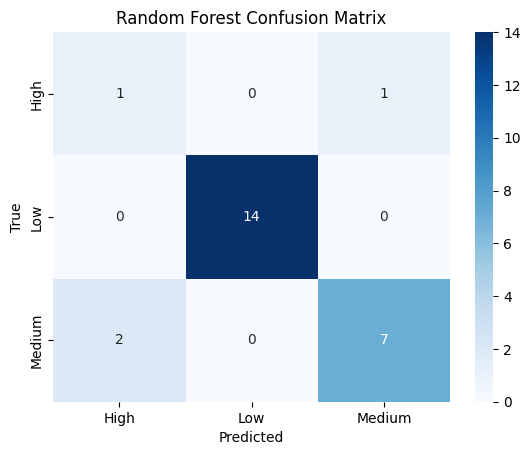


Top Features (Feature Importance):
readability       0.542094
word_count        0.247361
sentence_count    0.210545
dtype: float64


--- Baseline Model Evaluation (Word Count Only) ---
Baseline (Word Count) Accuracy: 0.3200

--- Final Comparison ---
RandomForest Accuracy: 0.8800
Baseline Accuracy:     0.3200


In [40]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("--- 4. Content Quality Scoring: Evaluation ---")
print("\n--- RandomForest Model Evaluation ---")
y_pred = model.predict(X_test)
labels = sorted(y.unique()) # Defines the order for the reports
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro', labels=labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score (Macro): {f1:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=labels, zero_division=0))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=labels)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()
print("\nTop Features (Feature Importance):")
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.nlargest(3))
print("\n\n--- Baseline Model Evaluation (Word Count Only) ---")

def word_count_baseline(wc):
    if wc > 1500:
        return 'High'
    elif wc < 500:
        return 'Low'
    else:
        return 'Medium'
baseline_preds = X_test['word_count'].apply(word_count_baseline)
baseline_accuracy = accuracy_score(y_test, baseline_preds)
print(f"Baseline (Word Count) Accuracy: {baseline_accuracy:.4f}")
print("\n--- Final Comparison ---")
print(f"RandomForest Accuracy: {accuracy:.4f}")
print(f"Baseline Accuracy:     {baseline_accuracy:.4f}")

---  RandomForest Model Evaluation ---
Accuracy: 0.8800
F1-Score (Macro): 0.7412

Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.50      0.40         2
         Low       1.00      1.00      1.00        14
      Medium       0.88      0.78      0.82         9

    accuracy                           0.88        25
   macro avg       0.74      0.76      0.74        25
weighted avg       0.90      0.88      0.89        25

Confusion Matrix:
[[ 1  0  1]
 [ 0 14  0]
 [ 2  0  7]]




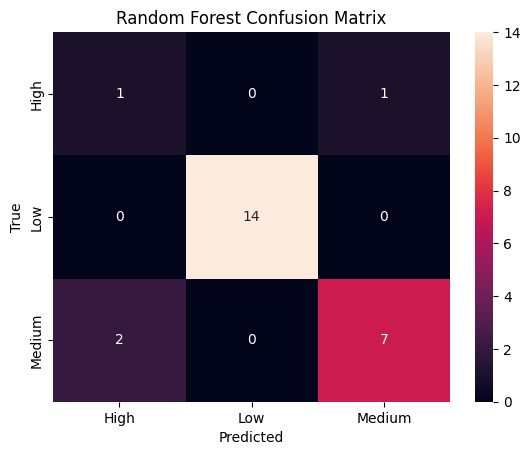


Top Features (Feature Importance):
readability       0.542094
word_count        0.247361
sentence_count    0.210545
dtype: float64


--- Baseline Model Evaluation (Word Count Only) ---
Baseline (Word Count) Accuracy: 0.3200

--- Final Comparison ---
RandomForest Accuracy: 0.8800
Baseline Accuracy:     0.3200
⚙️  Calculating Top 5 Keywords...
✅ Top 5 keywords extracted.


In [41]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("---  RandomForest Model Evaluation ---")
y_pred = model.predict(X_test)
labels = sorted(y.unique())
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro', labels=labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score (Macro): {f1:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, labels=labels, zero_division=0))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=labels)
print(cm)
print("\n")
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()
print("\nTop Features (Feature Importance):")
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.nlargest(3))
print("\n\n--- Baseline Model Evaluation (Word Count Only) ---")
def word_count_baseline(wc):
    if wc > 1500:
        return 'High'
    elif wc < 500:
        return 'Low'
    else:
        return 'Medium'
baseline_preds = X_test['word_count'].apply(word_count_baseline)
baseline_accuracy = accuracy_score(y_test, baseline_preds)
print(f"Baseline (Word Count) Accuracy: {baseline_accuracy:.4f}")
print("\n--- Final Comparison ---")
print(f"RandomForest Accuracy: {accuracy:.4f}")
print(f"Baseline Accuracy:     {baseline_accuracy:.4f}")
if "top_keywords" not in data.columns:
    from sklearn.feature_extraction.text import TfidfVectorizer
    from nltk.corpus import stopwords

    print("⚙️  Calculating Top 5 Keywords...")


    if 'clean_text' not in data.columns:
        stop_words_list = set(stopwords.words('english'))
        def clean_text_for_keywords(text):
            text = str(text).lower()
            text = re.sub(r'[^a-z\s]', ' ', text)
            words = [w for w in text.split() if w not in stop_words_list]
            return " ".join(words)
        data['clean_text'] = data['body_text'].apply(clean_text_for_keywords)
    tfidf_vec_keywords = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix_keywords = tfidf_vec_keywords.fit_transform(data['clean_text'].astype(str))
    feature_names_keywords = tfidf_vec_keywords.get_feature_names_out()

    top_keywords_list = []
    for i in range(tfidf_matrix_keywords.shape[0]):
        scores = tfidf_matrix_keywords[i].toarray().flatten()
        top_indices = scores.argsort()[-5:] # Get indices of top 5 scores
        top_keys = [feature_names_keywords[idx] for idx in top_indices][::-1] # Get keywords and reverse
        top_keywords_list.append('|'.join(top_keys)) # Join with a pipe '|'

    data['top_keywords'] = top_keywords_list
    print("✅ Top 5 keywords extracted.")

In [42]:
import requests, re, json
from bs4 import BeautifulSoup
import joblib
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textstat import flesch_reading_ease
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt_tab', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
data = pd.read_csv("final_quality_scores.csv")
model = joblib.load("quality_model.pkl")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    return " ".join([w for w in text.split() if w not in stop_words])

data["clean_text"] = data["body_text"].astype(str).apply(clean_text)
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(data["clean_text"])
print("✅ TF-IDF model ready for duplicate detection")
def extract_text_from_html(html):
    soup = BeautifulSoup(html, "html.parser")
    title = soup.title.string.strip() if soup.title and soup.title.string else ""
    for tag in soup(["script", "style", "noscript"]):
        tag.decompose()
    text = " ".join(soup.stripped_strings)
    return title, text

def safe_readability(text):
    try:
        if len(text.split()) < 50:
            return 0
        return flesch_reading_ease(text)
    except:
        return 0
def analyze_url(url):
    try:
        # --- Fetch and parse ---
        resp = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=10)
        title, text = extract_text_from_html(resp.text)

        # --- Feature extraction ---
        clean = clean_text(text)
        wc = len(clean.split())
        sc = len(sent_tokenize(clean))
        read = safe_readability(clean)

        # --- Predict quality ---
        features = [[wc, sc, read]]
        quality_pred = model.predict(features)[0]

        # --- Duplicate similarity check ---
        new_vec = tfidf.transform([clean])
        sims = cosine_similarity(new_vec, tfidf_matrix)[0]
        similar_idx = np.where(sims > 0.75)[0]
        similar_pages = [
            {"url": data.iloc[i]["url"], "similarity": float(sims[i])}
            for i in similar_idx
        ][:3]

        # --- Final JSON output ---
        result = {
            "url": url,
            "title": title,
            "word_count": wc,
            "readability": read,
            "predicted_quality": quality_pred,
            "is_thin": wc < 500,
            "similar_pages": similar_pages,
        }
        return result

    except Exception as e:
        return {"error": str(e)}
test_result = analyze_url("https://example.com")
print(json.dumps(test_result, indent=2))


✅ TF-IDF model ready for duplicate detection
{
  "url": "https://example.com",
  "title": "Example Domain",
  "word_count": 15,
  "readability": 0,
  "predicted_quality": "Low",
  "is_thin": true,
  "similar_pages": []
}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
test_result = analyze_url("https://example.com")
print(json.dumps(test_result, indent=2))


{
  "url": "https://example.com",
  "title": "Example Domain",
  "word_count": 15,
  "readability": 0,
  "predicted_quality": "Low",
  "is_thin": true,
  "similar_pages": []
}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
